# Tensorflow 102 - 이미지 분류(CNN)
## 14강 내 이미지 사용하기 (실습)
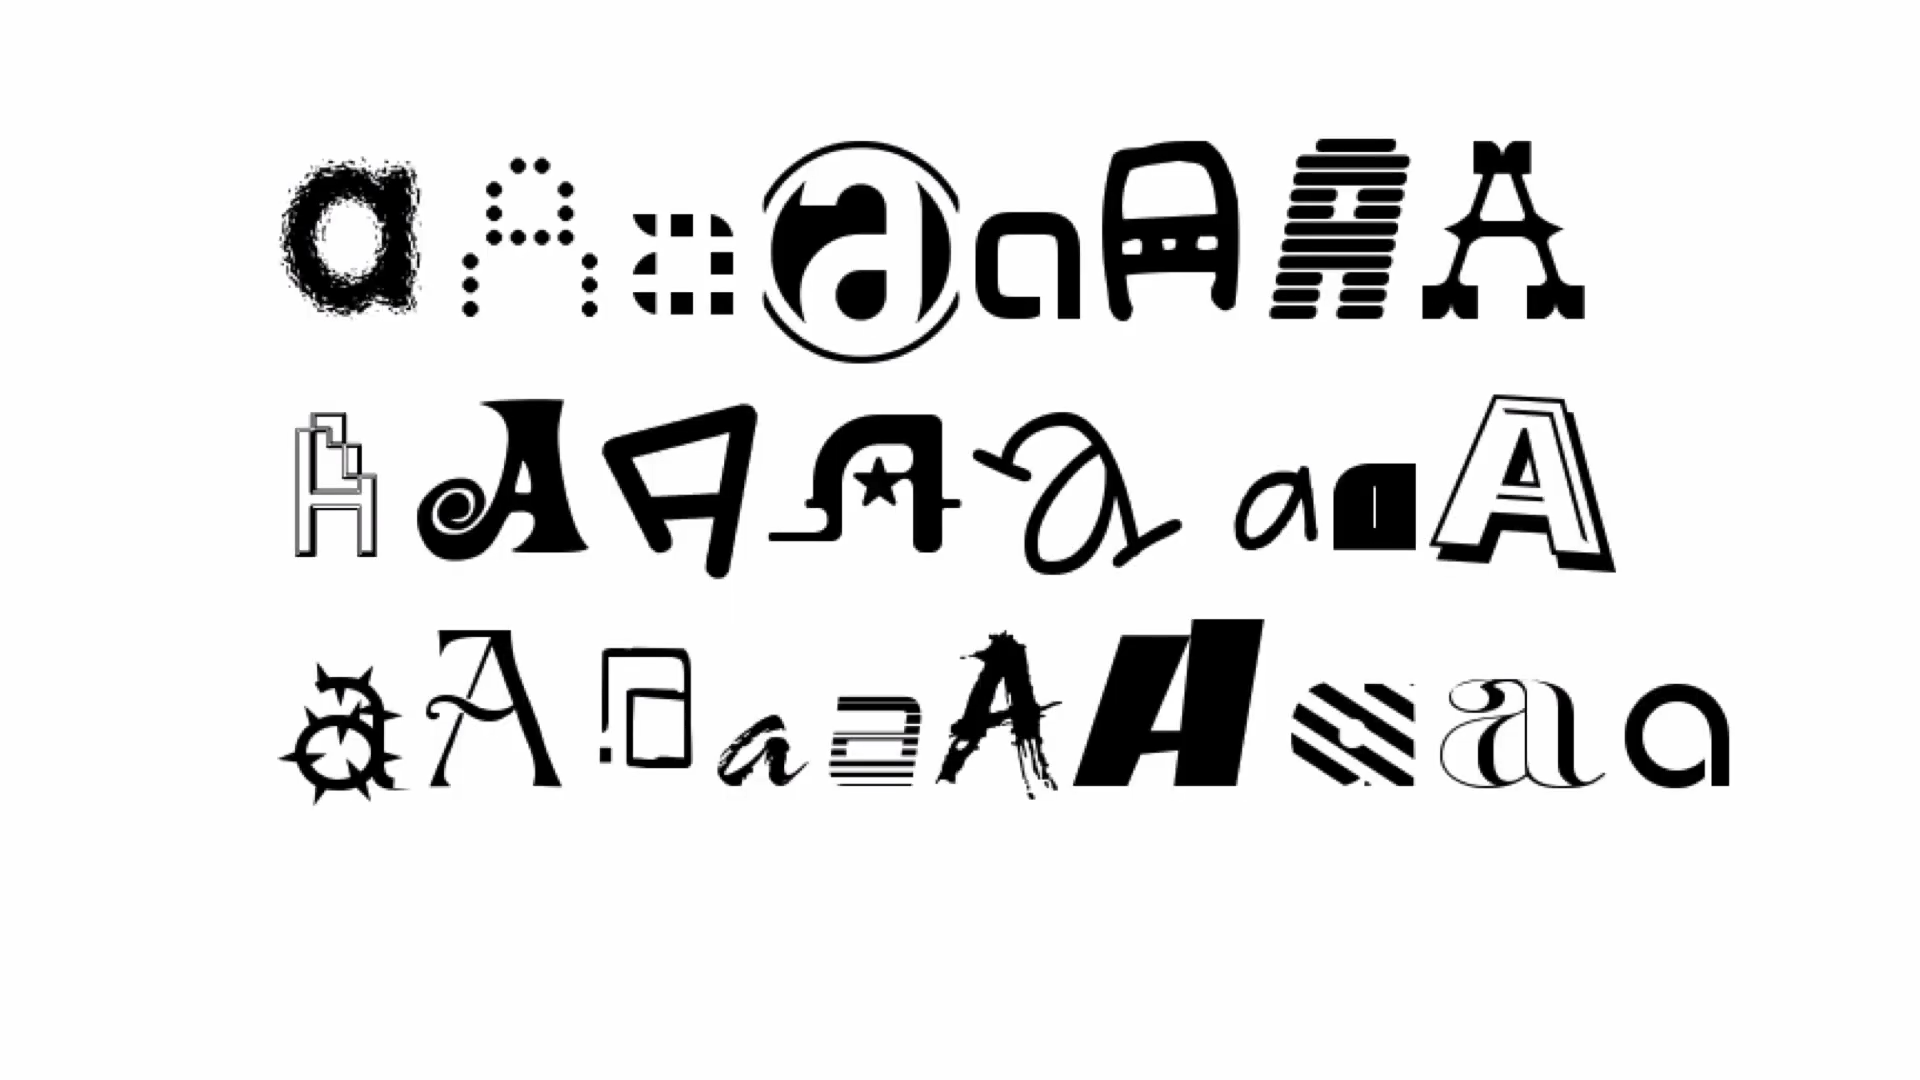

In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [12]:
# 이미지 읽어서 데이터 준비하기
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png') # glob.glob는 경로를 읽어오는것. paths에는 경로들이 저장됨.
paths = np.random.permutation(paths) # paths에 저장된 경로들을 랜덤으로 셔플
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))]) # paths에 저장된 경로에 가서 이미지를 읽어들임
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))]) # paths에 들어있는 정답을 읽어들임
print(독립.shape, 종속.shape) # (18724, 28, 28) (18724,) -> 컬러이미지라면 (18724, 28, 28 3) 출력되었을 것

(18724, 28, 28) (18724,)


In [13]:
종속[0:10]

array(['B', 'G', 'G', 'C', 'F', 'B', 'A', 'J', 'B', 'F'], dtype='<U1')

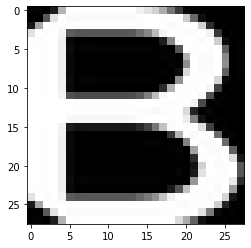

In [14]:
plt.imshow(독립[0], cmap='gray')

In [4]:
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [5]:
# 모델 완성
import tensorflow as tf

X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X) #픽셀 크기를 줄이지 않기 위해 padding='same'
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [6]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 35s 6ms/step - loss: 0.5151 - accuracy: 0.8499
Epoch 2/10
586/586 [==============================] - 3s 6ms/step - loss: 0.2689 - accuracy: 0.9183
Epoch 3/10
586/586 [==============================] - 3s 6ms/step - loss: 0.2133 - accuracy: 0.9336
Epoch 4/10
586/586 [==============================] - 3s 6ms/step - loss: 0.1773 - accuracy: 0.9452
Epoch 5/10
586/586 [==============================] - 3s 5ms/step - loss: 0.1498 - accuracy: 0.9517
Epoch 6/10
586/586 [==============================] - 3s 6ms/step - loss: 0.1238 - accuracy: 0.9603
Epoch 7/10
586/586 [==============================] - 3s 6ms/step - loss: 0.1042 - accuracy: 0.9669
Epoch 8/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0860 - accuracy: 0.9737
Epoch 9/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0740 - accuracy: 0.9762
Epoch 10/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0577 - accuracy: 0.981